In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../Data/Train.txt", names=column_names)
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [2]:
def show_feature_in_relation_to_attack_bar_chart(feature, xlabel, ylabel):
    for label in ["normal", "malicious"]:
        title = f"Bar chart of {feature} and their occurrences for the attack class '{label}'"
        if label == "normal":
            l, v = np.unique(dataset[dataset['attack'] == "normal"][feature], return_counts=True)
        else:
            l, v = np.unique(dataset[dataset['attack'] != "normal"][feature], return_counts=True)
            
        
        graphs = max(round(len(l)/20), 1)
        
        labels_split = np.array_split(l, graphs)
        values_split = np.array_split(v, graphs)
        
        for index in range(len(labels_split)):
            plt.barh(labels_split[index], values_split[index], align="center")
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.title(title)
            if len(labels_split) > 1:
                plt.title(f"{title} part {index+1}")
            else:
                plt.title(title)
            plt.show()

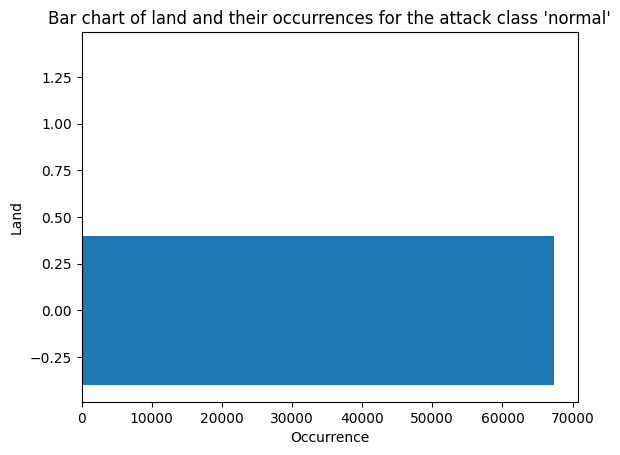

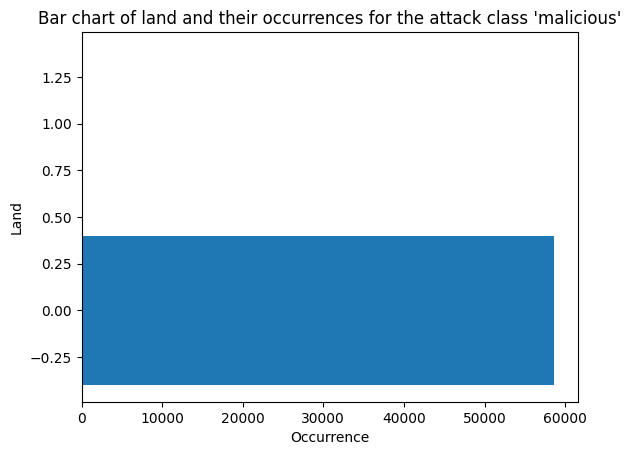

In [3]:
# Little indication
show_feature_in_relation_to_attack_bar_chart("land", "Occurrence", "Land")

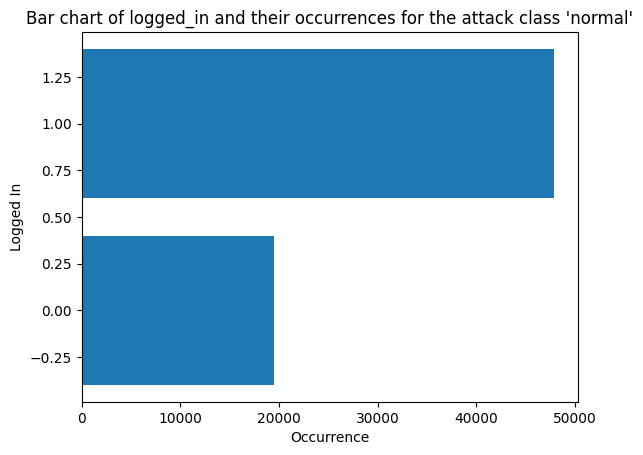

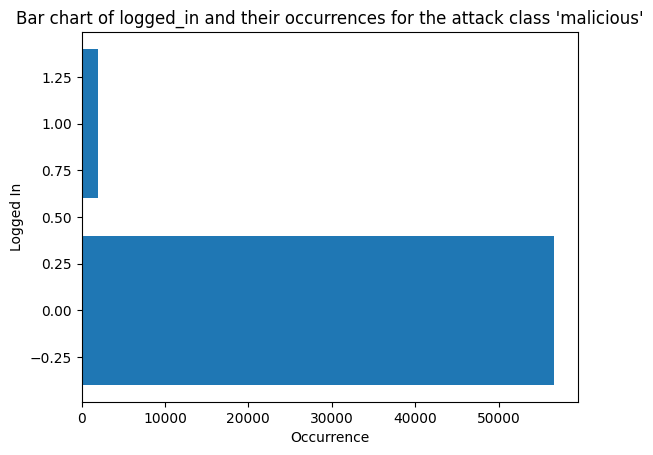

In [4]:
# Most of the connections not logged in are malicious connections
show_feature_in_relation_to_attack_bar_chart("logged_in", "Occurrence", "Logged In")

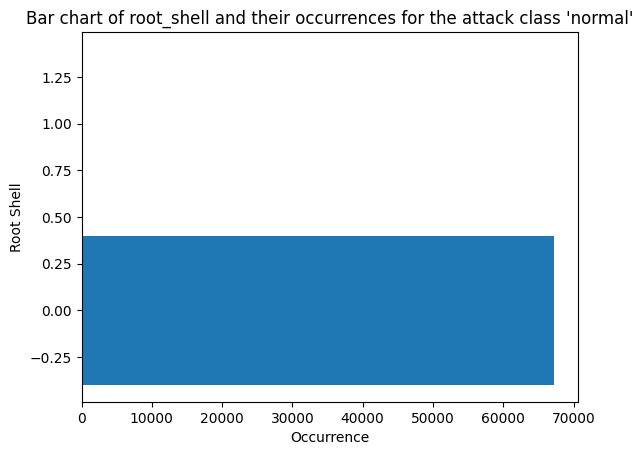

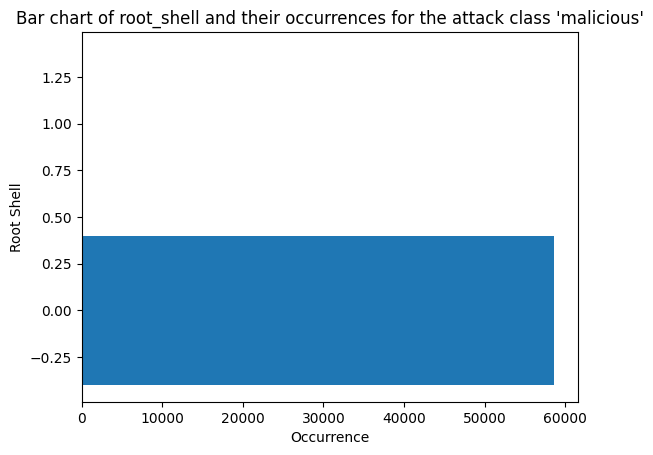

In [5]:
# Little indication
show_feature_in_relation_to_attack_bar_chart("root_shell", "Occurrence", "Root Shell")

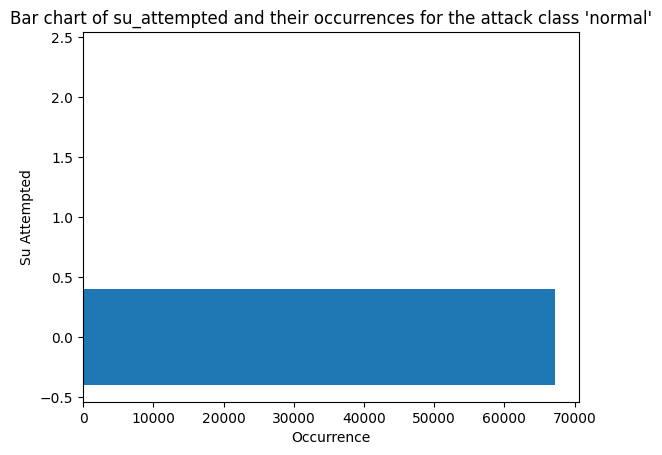

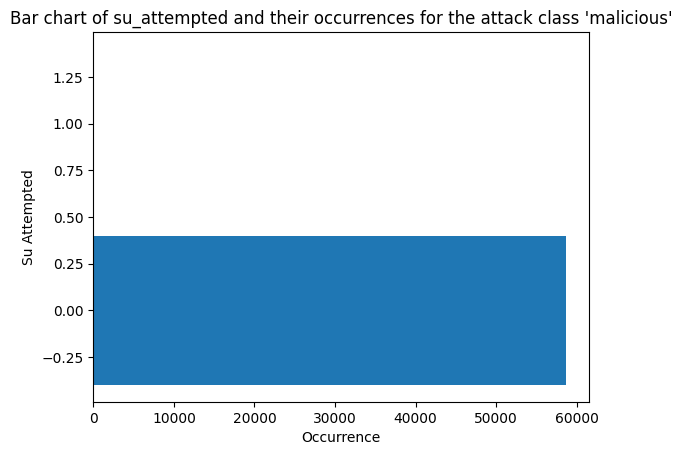

In [6]:
# Little indications
show_feature_in_relation_to_attack_bar_chart("su_attempted", "Occurrence", "Su Attempted")

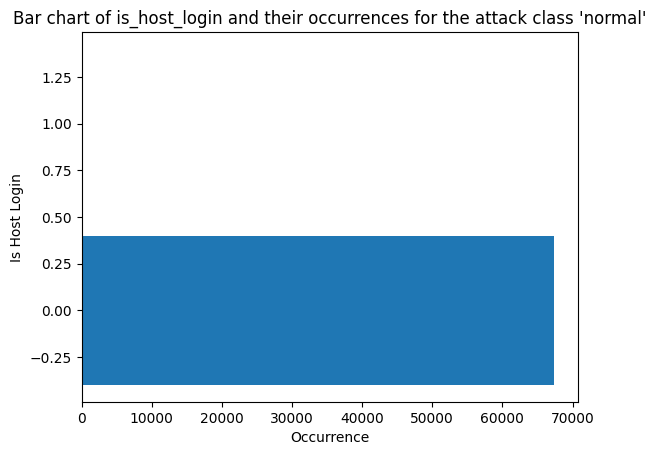

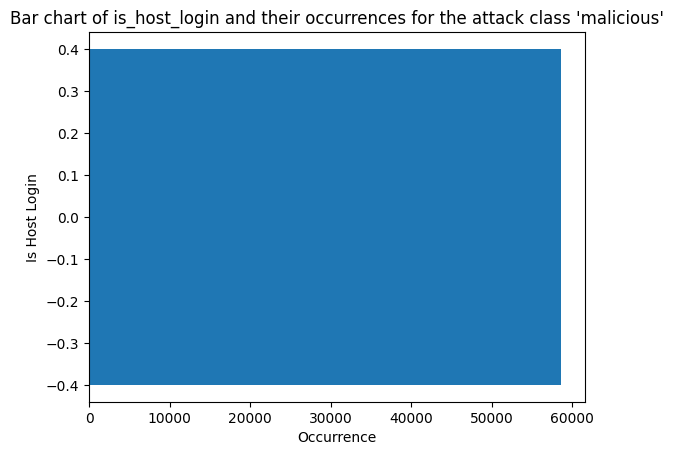

In [7]:
# Little indication
show_feature_in_relation_to_attack_bar_chart("is_host_login", "Occurrence", "Is Host Login")

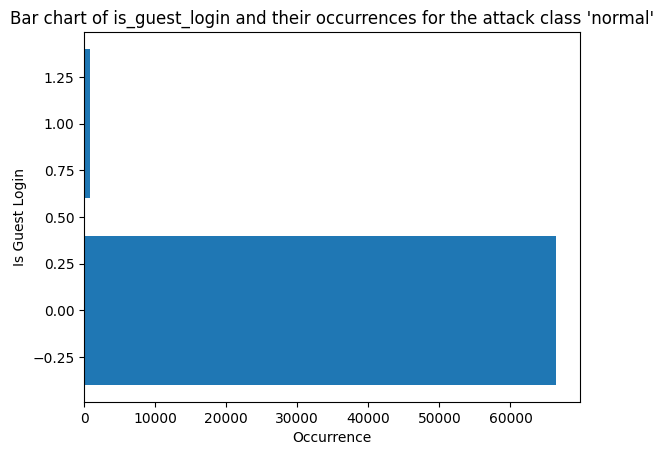

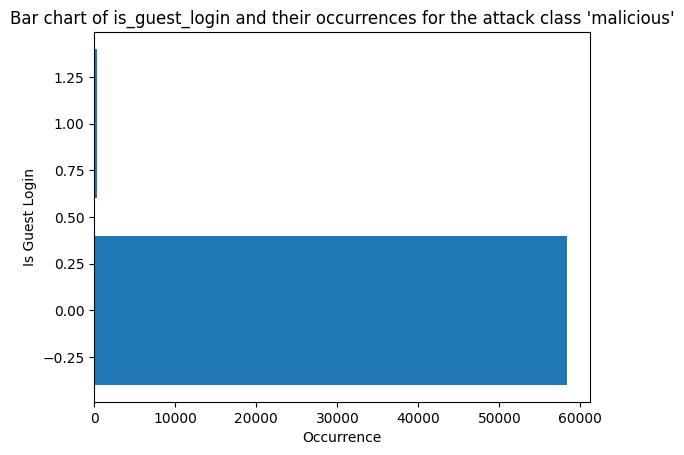

In [8]:
# Little indication
show_feature_in_relation_to_attack_bar_chart("is_guest_login", "Occurrence", "Is Guest Login")